# Problem Statement

World Health Organization(WHO) conducted a world-wide survey and collected data from various regions of the world to determine life expectancy of the people of those regions. They collected this data through local sources and with the help of several local and internation NGOs that were operating in those areas.

The data we have is a sample of the original data collected by WHO. Your job is to follow the Data Science pipeline and build a Machine Learning model that will predict the average life expectancy of the people of an area based on given features. The pipeline is as follows:

1. Data Wrangling and Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Training
5. Testing and Optimization

***While solving this problem, build an intuition about which features are useful using a thorough analysis and build a regression model with minimum loss/error. The evaluation metric that will be used is Mean Absolute Error. Also make sure that you model is neither underfitting nor overfitting.***  

In [284]:
#Mount drive

In [285]:
# If you want to install any missing packages, then uncomment the lines given below and run them
# to ensure that you have all the dependencies you need to run the notebook.

# pip install matplotlib numpy pandas scikit-learn seaborn scipy LGBMRegressor XGBRegressor

In [286]:
# Libraries
#List down here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import gmean
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge


## Data Description

The first thing you need to do before solving any Data Science problem is getting familiar with the dataset. Get to know your data by printing out some stats, checking its dimensions and checking data types of features.

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [287]:
# Load training data from your google drive
data = pd.read_csv('train.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head().transpose()

,0,1,2,3,4
surface_area,120540.0,752610.0,1396.0,2758812.0,340.0
agricultural_land,2632839.465438,24030389.105693,3000.0,122884535.217072,11000.000001
forest_area,5417843.036231,49575535.051996,80.0,105094302.736211,16990.000002
armed_forces_total,1379000.0,16500.0,NaN,1518650.0,NaN
urban_pop_major_cities,55.747169,16.890687,18.39009,50.966885,5.311885
urban_pop_minor_cities,4.688831,23.136313,23.13991,24.522427,30.271115
national_income,unknown,very low,unknown,high,unknown
inflation_annual,NaN,NaN,NaN,1.374906,-0.044229
inflation_monthly,NaN,0.581473,NaN,NaN,NaN
inflation_weekly,NaN,NaN,NaN,NaN,NaN


In [288]:
# Dimensions of training data
data.shape

(362, 16)

In [289]:
# Explore columns in your dataset
data.columns

Index(['surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [290]:
# Description of your dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
surface_area,362.0,4.021884e+06,1.234491e+07,30.300000,2.783000e+04,2.037745e+05,1.081610e+06,1.343253e+08
agricultural_land,358.0,1.594881e+08,4.964143e+08,300.000000,1.054198e+06,5.360256e+06,4.221935e+07,5.067600e+09
forest_area,357.0,1.204151e+08,3.796623e+08,0.000000,4.951445e+05,3.928535e+06,2.241297e+07,4.132117e+09
armed_forces_total,318.0,9.849864e+05,2.994686e+06,50.000000,1.218000e+04,5.352500e+04,2.598000e+05,2.720662e+07
urban_pop_major_cities,360.0,2.765946e+01,2.051288e+01,0.091444,1.062462e+01,2.445944e+01,3.858718e+01,9.240907e+01
urban_pop_minor_cities,360.0,2.917524e+01,2.120649e+01,0.074575,1.101374e+01,2.673513e+01,4.349942e+01,8.914290e+01
inflation_annual,146.0,1.681539e+00,9.803077e-01,-2.372263,1.202953e+00,1.762683e+00,2.485675e+00,2.997694e+00
inflation_monthly,156.0,4.759692e-01,1.534300e-01,0.250543,3.477989e-01,4.597899e-01,5.773399e-01,8.101523e-01
inflation_weekly,20.0,3.964783e-01,2.035834e-01,0.209993,2.321181e-01,2.979383e-01,5.375414e-01,7.815275e-01
secure_internet_servers_total,352.0,2.949654e+08,7.234006e+08,40025.000000,3.468446e+06,2.671228e+07,2.173937e+08,8.207343e+09


In [291]:
# Check Datatypes
data.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [292]:
# Print head of your dataset
data.head().transpose()

,0,1,2,3,4
surface_area,120540.0,752610.0,1396.0,2758812.0,340.0
agricultural_land,2632839.465438,24030389.105693,3000.0,122884535.217072,11000.000001
forest_area,5417843.036231,49575535.051996,80.0,105094302.736211,16990.000002
armed_forces_total,1379000.0,16500.0,NaN,1518650.0,NaN
urban_pop_major_cities,55.747169,16.890687,18.39009,50.966885,5.311885
urban_pop_minor_cities,4.688831,23.136313,23.13991,24.522427,30.271115
national_income,unknown,very low,unknown,high,unknown
inflation_annual,NaN,NaN,NaN,1.374906,-0.044229
inflation_monthly,NaN,0.581473,NaN,NaN,NaN
inflation_weekly,NaN,NaN,NaN,NaN,NaN


In [293]:
# Print tail of your dataset
data.tail().transpose()

,357,358,359,360,361
surface_area,243610.0,9831510.0,176220.0,330972.0,350.0
agricultural_land,17369988.105125,435757614.688246,14461477.888631,11606702.474289,4000.000001
forest_area,3131596.330561,332694329.419413,1811858.156321,15493464.636605,17819.999999
armed_forces_total,159150.0,1433150.0,25450.0,522000.0,NaN
urban_pop_major_cities,42.818424,22.948363,92.409069,27.411815,32.291719
urban_pop_minor_cities,39.273576,58.328637,2.573931,4.897185,62.772281
national_income,high,very high,medium high,low,unknown
inflation_annual,2.554547,1.464833,NaN,NaN,NaN
inflation_monthly,NaN,NaN,0.714595,0.549355,NaN
inflation_weekly,NaN,NaN,NaN,NaN,NaN


## Data Wrangling and Preprocessing

This is perhaps the most time consuming and challenging part of any Data Science or Machine Learning problem. You have to preprocess your data in order to make it useful for data analysis and model training. Although, the steps involved vary depending on the problem and the dataset but here we have provided a roughly generic approach which is applicable for most problems. The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [294]:
# Check for any null or missing values in your dataset
data.isnull().any()

surface_area                     False
agricultural_land                 True
forest_area                       True
armed_forces_total                True
urban_pop_major_cities            True
urban_pop_minor_cities            True
national_income                  False
inflation_annual                  True
inflation_monthly                 True
inflation_weekly                  True
mobile_subscriptions             False
internet_users                   False
secure_internet_servers_total     True
improved_sanitation              False
women_parliament_seats_rate      False
life_expectancy                  False
dtype: bool

In [295]:
# Check missing values in each column of training data
data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [296]:
# check for the datatypes of columns as object
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [297]:
#Unique values in 'women_parliament_seats_rate'
data['women_parliament_seats_rate'].unique()

array(['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)'], dtype=object)

In [298]:
# Make a copy of data
data_copy = data.copy()

In [299]:
# Change data types of columns

# handling categorical data using label encoding
le = LabelEncoder()

data_copy['national_income'] = le.fit_transform(data_copy['national_income'])

data_copy['internet_users'] = le.fit_transform(data_copy['internet_users'])

data_copy['mobile_subscriptions'] = le.fit_transform(data_copy['mobile_subscriptions'])

data_copy['improved_sanitation'] = le.fit_transform(data_copy['improved_sanitation'])

data_copy['women_parliament_seats_rate'] = le.fit_transform(data_copy['women_parliament_seats_rate'])

In [300]:
# Compare Actual and Encoded labels

print("Column: national_income")
print(data['national_income'].unique())
print(data_copy['national_income'].unique())

print("Column: mobile_subscriptions")
print(data['mobile_subscriptions'].unique())
print(data_copy['mobile_subscriptions'].unique())

print("Column: improved_sanitation")
print(data['improved_sanitation'].unique())
print(data_copy['improved_sanitation'].unique())

print("Column: women_parliament_seats_rate")
print(data['women_parliament_seats_rate'].unique())
print(data_copy['women_parliament_seats_rate'].unique())


Column: national_income
['unknown' 'very low' 'high' 'medium low' 'medium high' 'low' 'very high']
[4 6 0 3 2 1 5]
Column: mobile_subscriptions
['less than 1 per person' 'more than 1 per person'
 'more than 2 per person' 'unknown' 'more than 3 per person']
[0 1 2 4 3]
Column: improved_sanitation
['high access' 'low access' 'no info' 'very high access' 'medium access'
 'very low access']
[0 1 3 4 2 5]
Column: women_parliament_seats_rate
['[0%-25%)' 'unknown' '[25%-50%)' '[50%-75%)']
[0 3 1 2]


In [301]:
# Change data types of columns

# handling categorical data using label encoding
le = LabelEncoder()

data['national_income'] = le.fit_transform(data['national_income'])

data['internet_users'] = le.fit_transform(data['internet_users'])

data['mobile_subscriptions'] = le.fit_transform(data['mobile_subscriptions'])

data['improved_sanitation'] = le.fit_transform(data['improved_sanitation'])

data['women_parliament_seats_rate'] = le.fit_transform(data['women_parliament_seats_rate'])

In [302]:
# Convert unknown in internet_uses to -1
data['internet_users'] = data['internet_users'].replace('unknown', -1)

In [303]:
# Show missing values by filling in the 'internet_uses' attribute
data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [304]:
# Deal with Missing Values use suitable method for all mentioned columns
columns = ['agricultural_land', 'forest_area', 'armed_forces_total',
           'urban_pop_minor_cities', 'urban_pop_major_cities','inflation_annual' ,'inflation_monthly','inflation_weekly','secure_internet_servers_total']



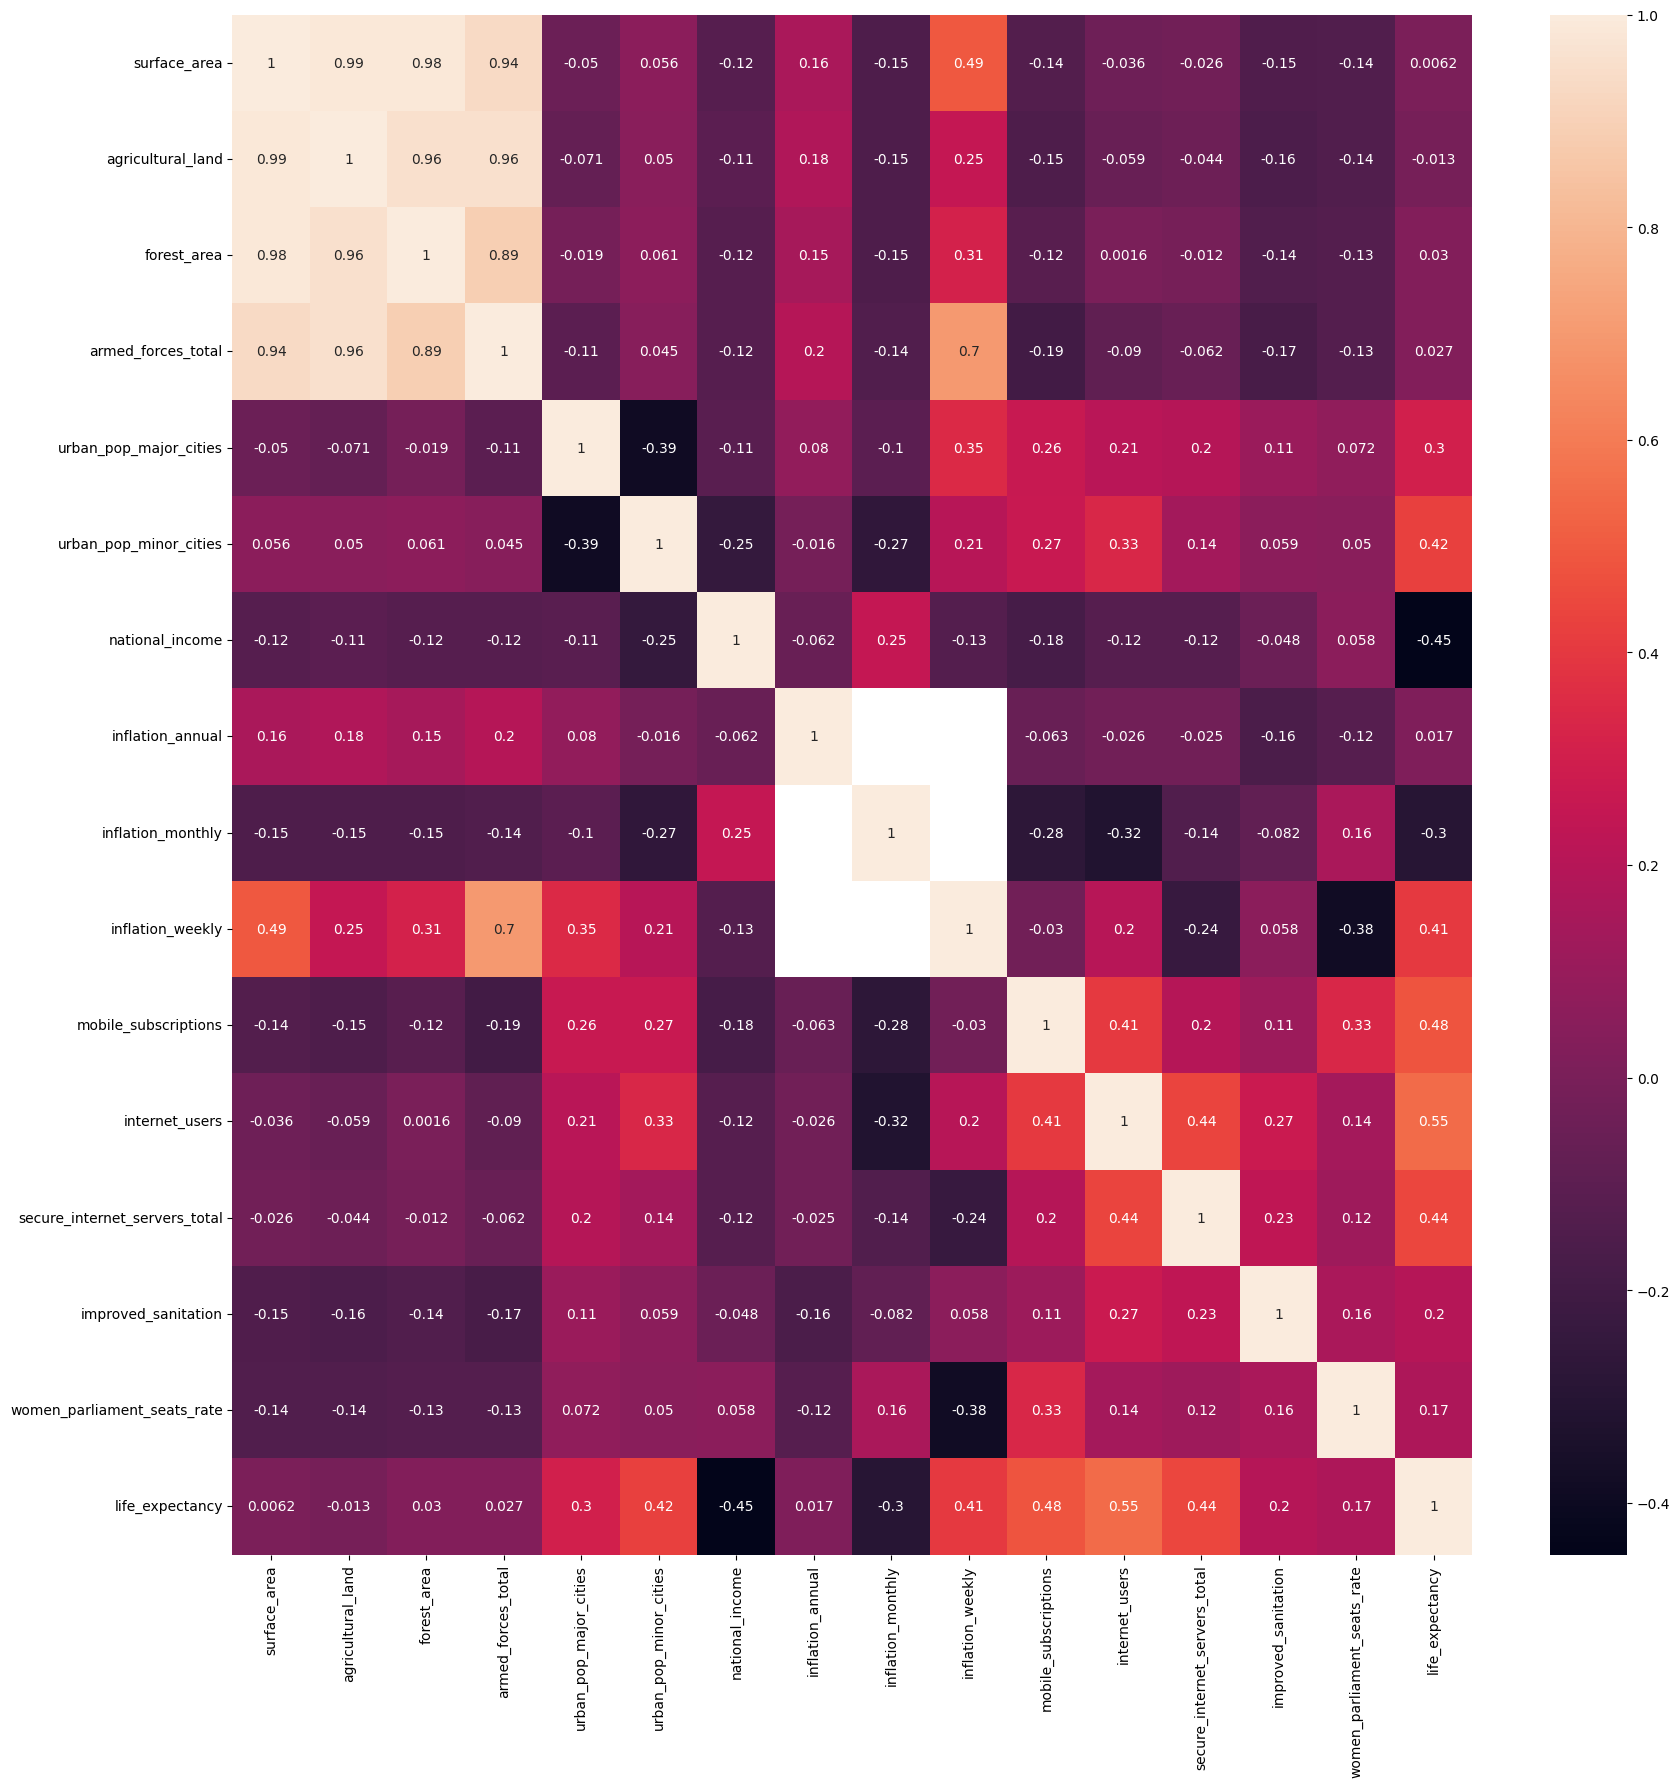

In [305]:
# seeing correlated features
corr = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


Correlation value:  0.9835764656058498


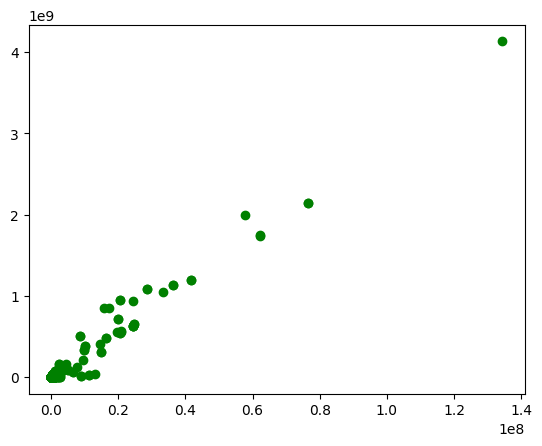

In [306]:
# we have zero missing values in surface_area colum and to see how much it is correlated with forest_area 
# we will plot a scatter plot and we will find correlation. 
# Having high correlation means that surface_area is a good predictor for forest_area

plt.scatter(data['surface_area'], data['forest_area'], color='green')

surface_area_forest_area_corr = data['surface_area'].corr(data['forest_area'])
print("Correlation value: ", surface_area_forest_area_corr)


R2 Score: 0.9720031519235981


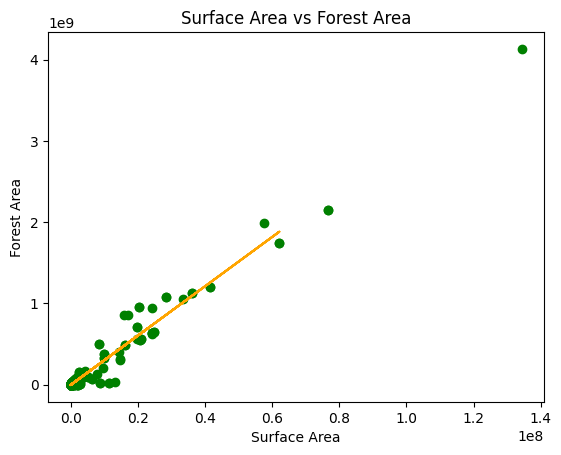

In [307]:
# since we have high correlation between surface_area and forest_area we can use linear regression to predict forest_area
data_copy = data.copy()

data_copy.dropna(subset=['surface_area', 'forest_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['forest_area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# ploting the regression line 
plt.scatter(X, y, color='green')
plt.plot(X_test, y_pred, color='orange')
plt.xlabel('Surface Area')
plt.ylabel('Forest Area')
plt.title('Surface Area vs Forest Area')
plt.show()



In [308]:
# Fill missing values in forest_area column using surface_area column
data['forest_area'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['forest_area']) else row['forest_area'],
    axis=1
)

Correlation value:  0.9872561341506503


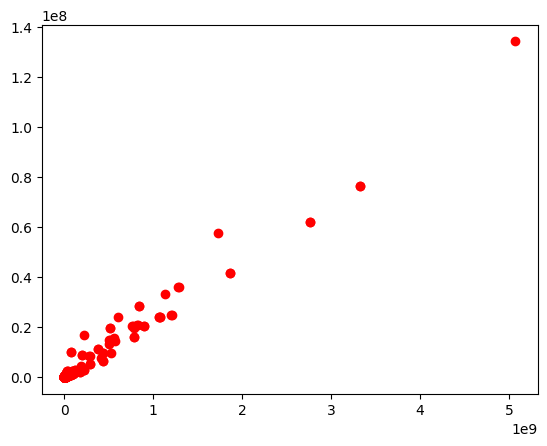

In [309]:
# Ploting the scatter plot between agriculture_area and surface_area
# Checking the correlation between agriculture_area and surface_area

plt.scatter(data['agricultural_land'], data['surface_area'], color='red')
agriculture_area_surface_area_corr = data['agricultural_land'].corr(data['surface_area'])
print("Correlation value: ", agriculture_area_surface_area_corr)

R2 Score: 0.9672326023072718


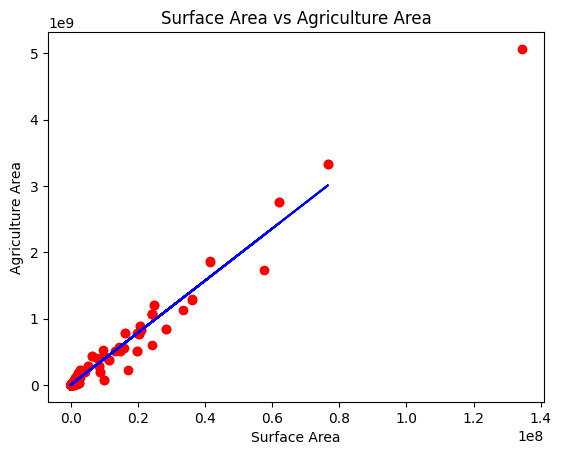

In [310]:
# Getting 0.98 correlation between agriculture_area and surface_area
# we can use linear regression to fill missing values in agriculture_area column
data_copy = data.copy()

data_copy.dropna(subset=['agricultural_land', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['agricultural_land'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Surface Area vs Agriculture Area')
plt.xlabel('Surface Area')
plt.ylabel('Agriculture Area')
plt.show()

In [311]:
# Fill missing values in agriculture_area column using surface_area column
data['agricultural_land'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['agricultural_land']) else row['agricultural_land'],
    axis=1
)

Correlation value:  0.9353627656424193


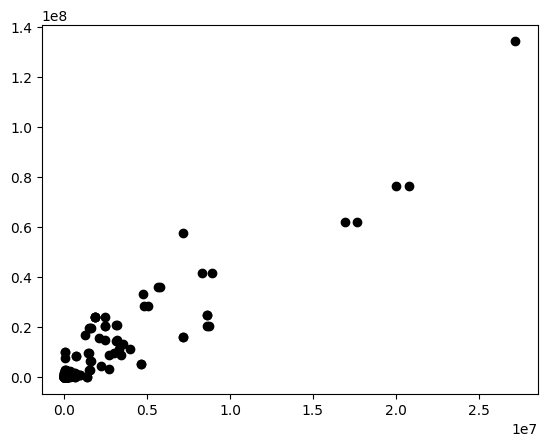

In [312]:
# Ploting the scatter plot between armed_forces_total and surface_area
# Checking the correlation between armed_forces_total and surface_area

plt.scatter(data['armed_forces_total'], data['surface_area'], color='black')

correlation = data['armed_forces_total'].corr(data['surface_area'])
print("Correlation value: " ,correlation)


R2 Score: 0.8654565322512711


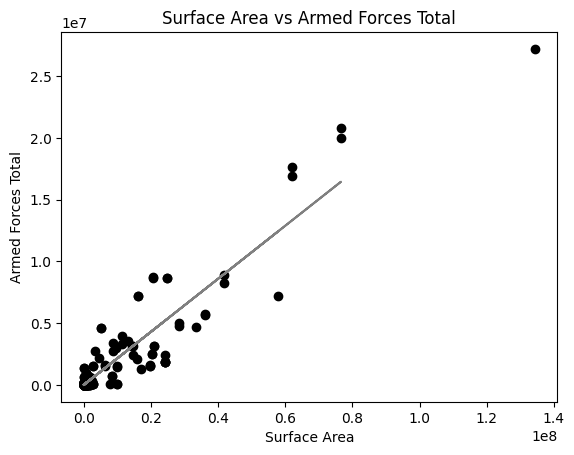

In [313]:
# Getting 0.93 correlation between armed_forces_total and surface_area
# we can use linear regression to fill missing values in armed_forces_total column
data_copy = data.copy()

data_copy.dropna(subset=['armed_forces_total', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)

y = data_copy['armed_forces_total'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='black')
plt.plot(X_test, y_pred, color='grey')
plt.title('Surface Area vs Armed Forces Total')
plt.xlabel('Surface Area')
plt.ylabel('Armed Forces Total')
plt.show()

In [314]:
# Fill missing values in armed_forces_total column using surface_area column
data['armed_forces_total'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['armed_forces_total']) else row['armed_forces_total'],
    axis=1
)

Text(0.5, 1.0, 'Urban Population Major Cities')

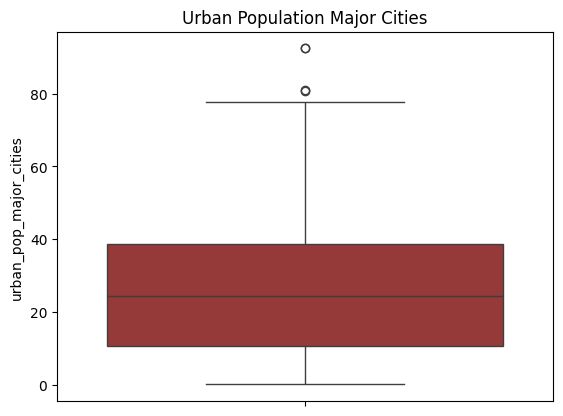

In [315]:
# checking for outliers by plotting boxplot

sns.boxplot(data['urban_pop_major_cities'], color="brown")
plt.title('Urban Population Major Cities')

In [316]:
# since we have outliers in urban_pop_major_cities column, we will use geometric mean to fill missing values
urban_pop_major_cities = data['urban_pop_major_cities']

urban_pop_major_cities = urban_pop_major_cities.dropna()

geometric_mean = gmean(urban_pop_major_cities)

data['urban_pop_major_cities'] = data['urban_pop_major_cities'].fillna(geometric_mean)

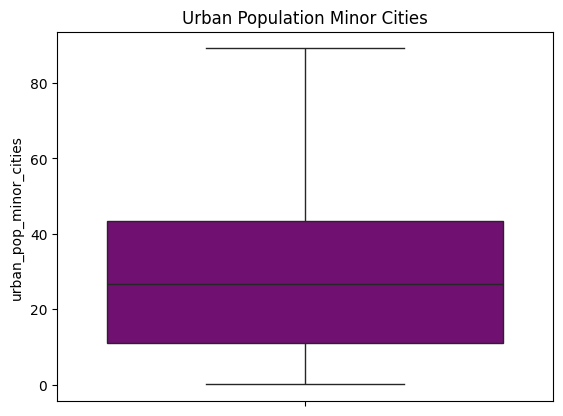

In [317]:
# checking for outliers by plotting boxplot

sns.boxplot(data['urban_pop_minor_cities'], color='purple')
plt.title('Urban Population Minor Cities')
plt.show()


In [318]:
# since no outliers in urban_pop_minor_cities column, we will use mean to fill missing values
urban_pop_minor_cities = data['urban_pop_minor_cities']

urban_pop_minor_cities = urban_pop_minor_cities.dropna()

mean = urban_pop_minor_cities.mean()

data['urban_pop_minor_cities'] = data['urban_pop_minor_cities'].fillna(mean)


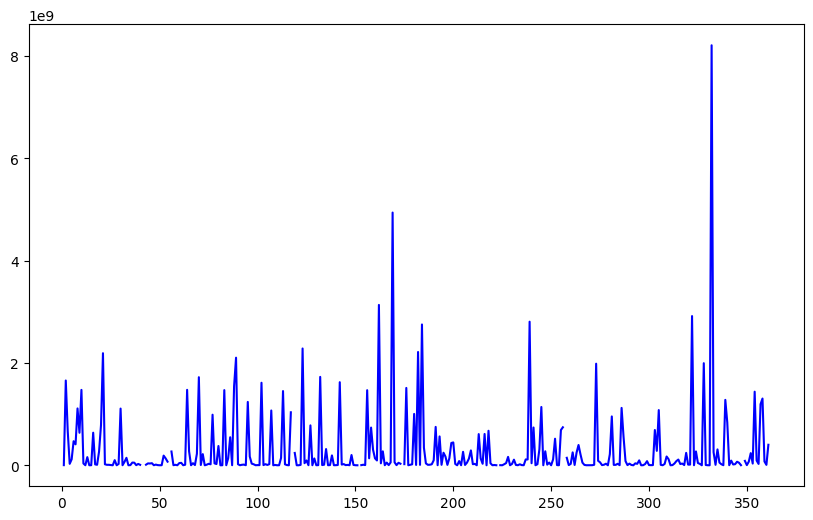

In [319]:
plt.figure(figsize=(10, 6))
plt.plot(data['secure_internet_servers_total'], color='blue')

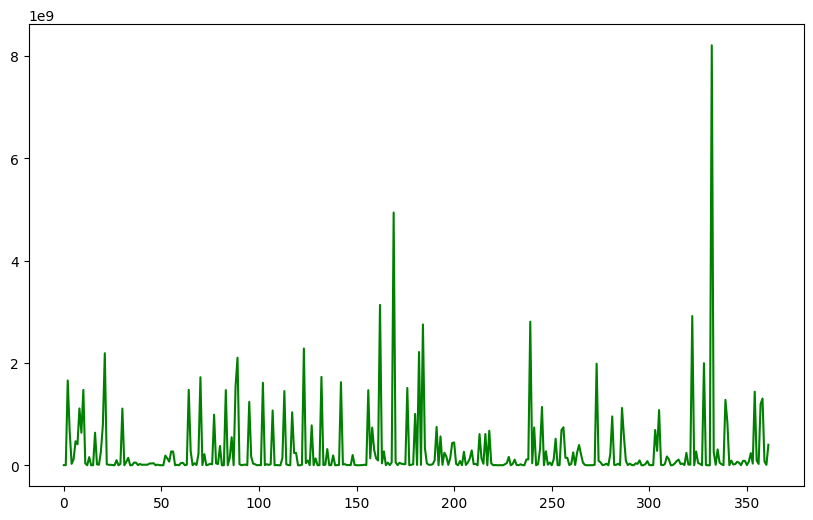

In [320]:
# since we have missing values in secure_internet_servers_total column
# we will use backward fill to fill missing values

data['secure_internet_servers_total'] = data['secure_internet_servers_total'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['secure_internet_servers_total'], color='green')

Text(0.5, 1.0, 'Inflation Annual After Filling Missing Values')

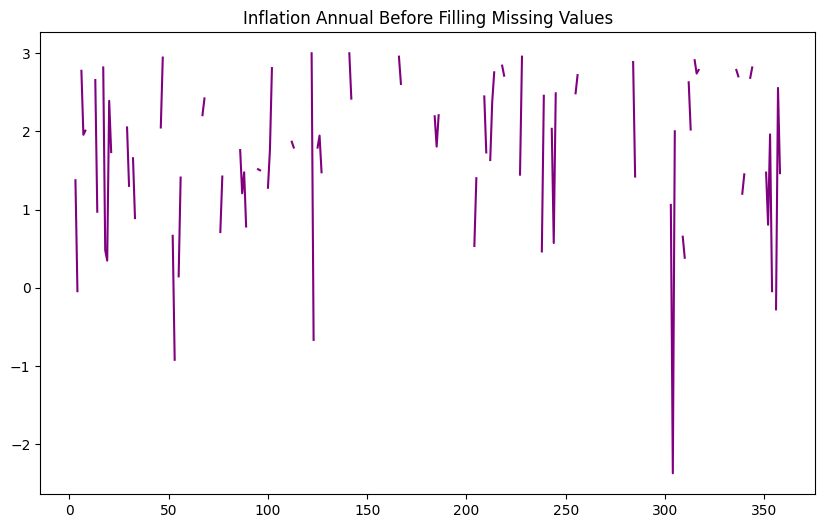

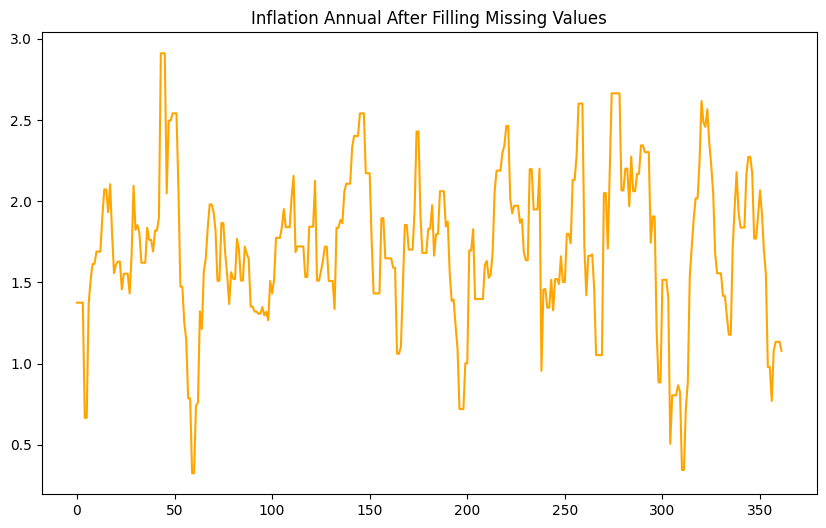

In [321]:
plt.figure(figsize=(10, 6))
plt.plot(data['inflation_annual'], color='purple')
plt.title('Inflation Annual Before Filling Missing Values')

# using local mean to fill missing values in inflation_annual column with window size of 10
data['inflation_annual'] = data['inflation_annual'].rolling(window=10, min_periods=1).mean()

# use backward fill to fill remaining missing values
data['inflation_annual'] = data['inflation_annual'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['inflation_annual'], color='orange')
plt.title('Inflation Annual After Filling Missing Values')


Text(0.5, 1.0, 'Inflation Monthly After Filling Missing Values')

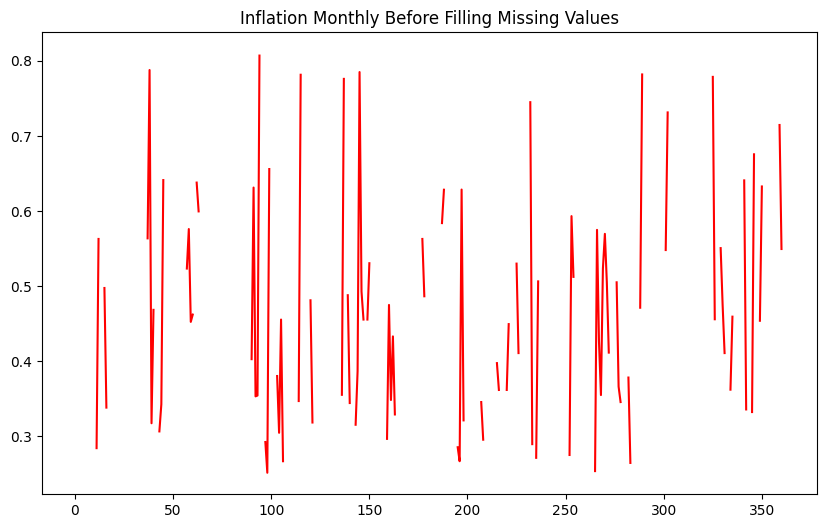

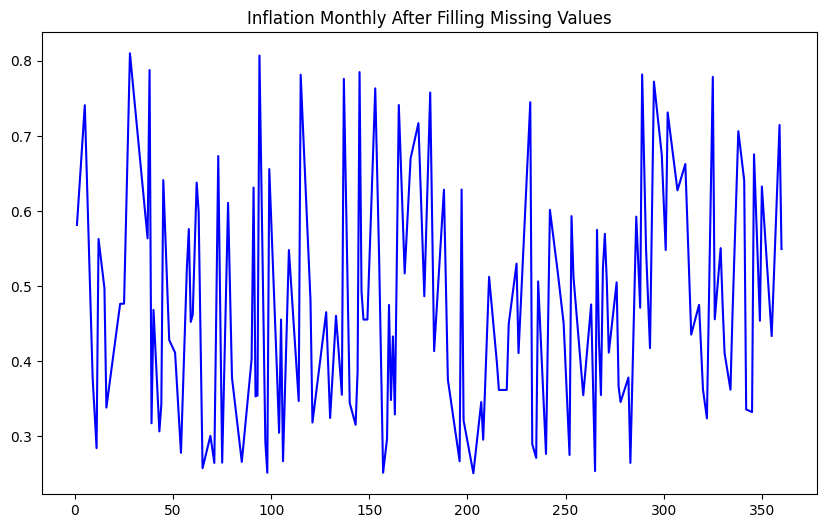

In [322]:
data_copy = data.copy()

plt.figure(figsize=(10, 6))
plt.plot(data_copy['inflation_monthly'], color='red')
plt.title('Inflation Monthly Before Filling Missing Values')

# using local mean to fill missing values in inflation_monthly column with window size of 10
data_copy['inflation_monthly'] = data_copy['inflation_monthly'].interpolate(method='slinear', limit_area='inside', limit=20)

plt.figure(figsize=(10, 6))
plt.plot(data_copy['inflation_monthly'], color='blue')
plt.title('Inflation Monthly After Filling Missing Values')

In [323]:
# as we can see from the plot, interpolation is better than using local mean to fill missing values
# so we will use interpolation to fill missing values in inflation_monthly column

data['inflation_monthly'] = data['inflation_monthly'].interpolate()

# fill missing values in inflation_monthly column using backward fill
data['inflation_monthly'] = data['inflation_monthly'].bfill()

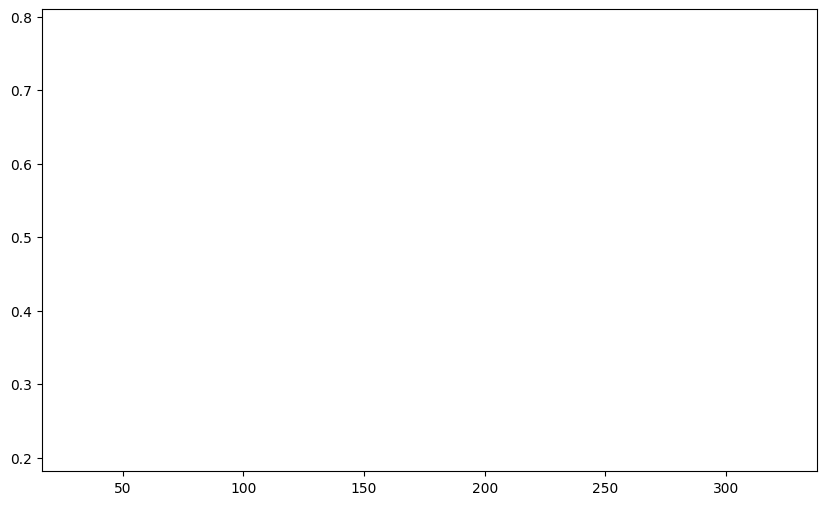

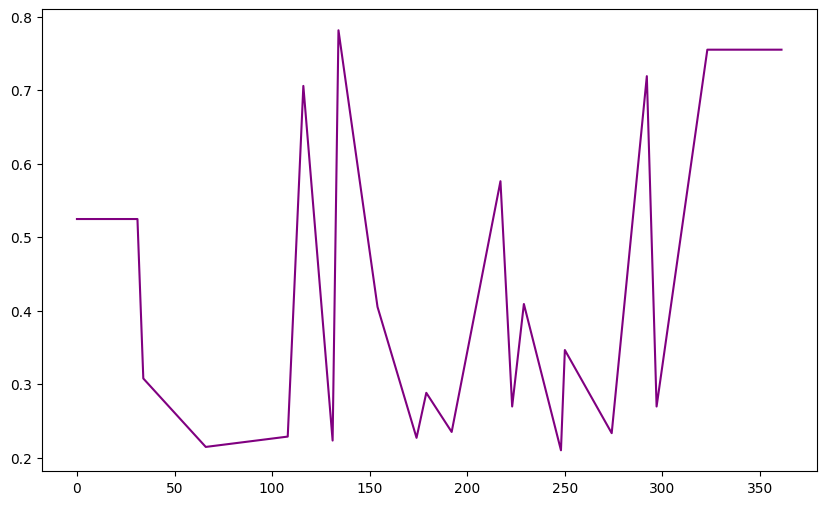

In [324]:
plt.figure(figsize=(10, 6))
plt.plot(data['inflation_weekly'], color='green')

# fill missing values in inflation_monthly column using interpolation
data['inflation_weekly'] = data['inflation_weekly'].interpolate()

# fill missing values in inflation_monthly column using backward fill
data['inflation_weekly'] = data['inflation_weekly'].bfill()

plt.figure(figsize=(10, 6))
plt.plot(data['inflation_weekly'], color='purple')


In [325]:
# Show all the attribute after filling in data points
data.isnull().sum()

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
inflation_monthly                0
inflation_weekly                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

## Data Analysis and Visualizations

Performing a detailed analysis of the data helps you understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. These include:

1. Bar Plots
2. Joint Plots
3. Box Plots
4. Correlation Heatmap
5. Distribution Plot
6. PCA Bi-plot

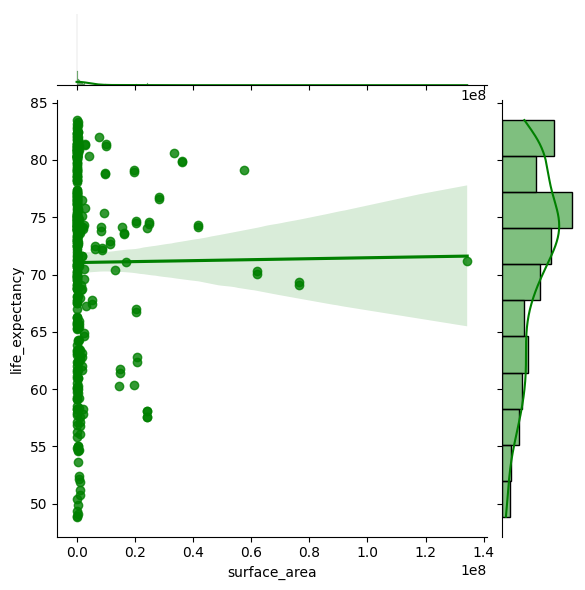

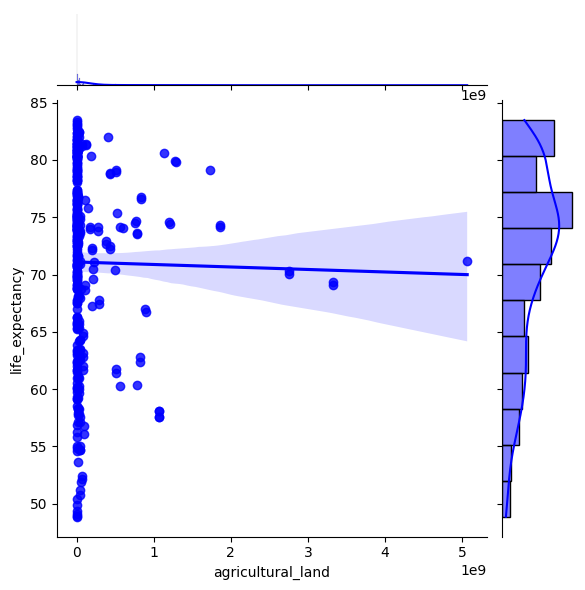

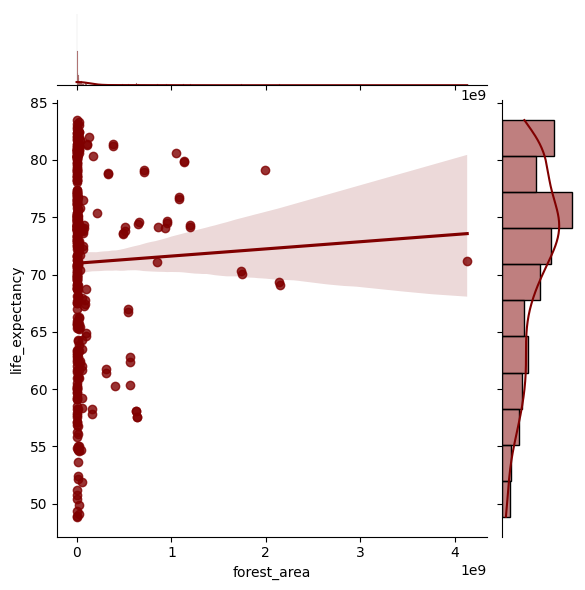

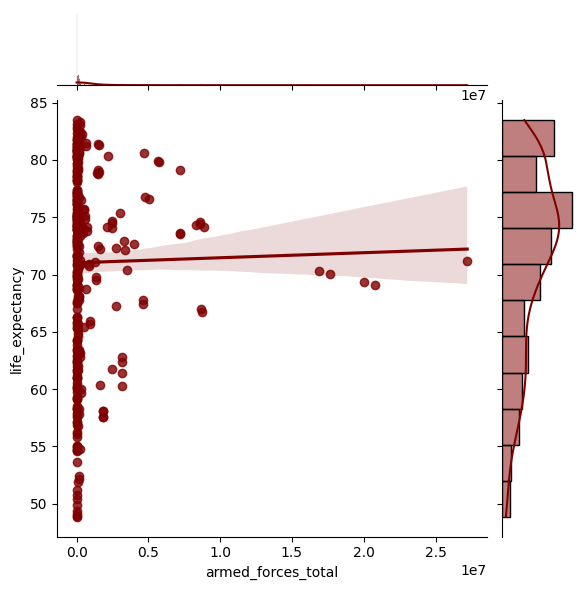

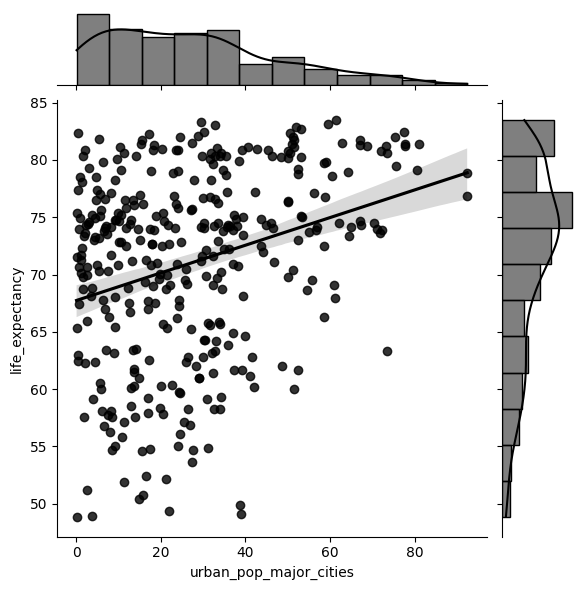

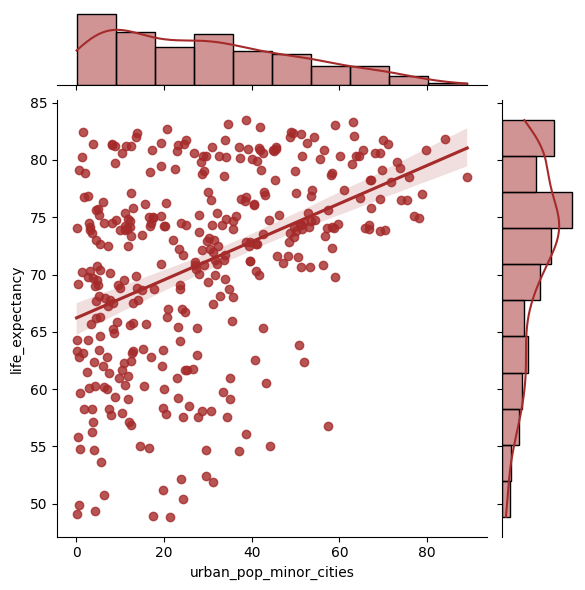

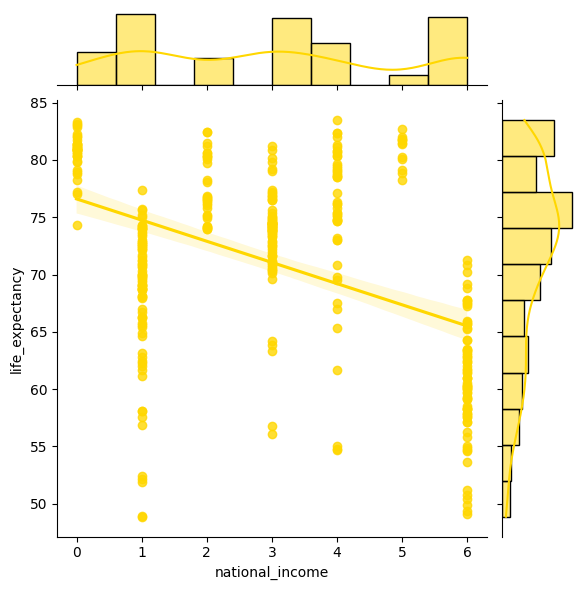

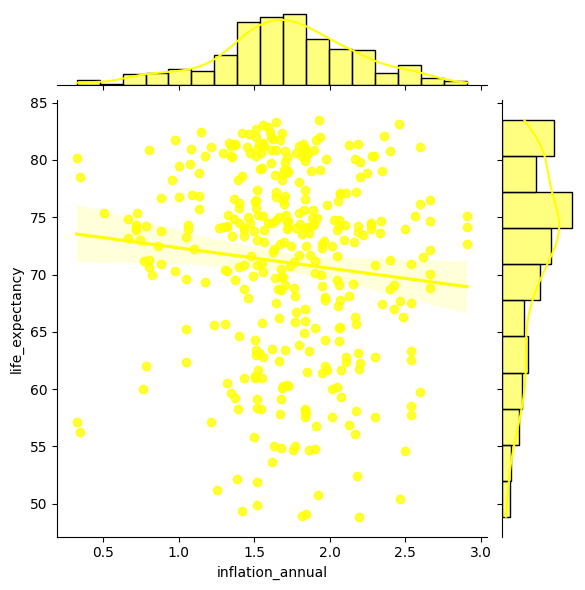

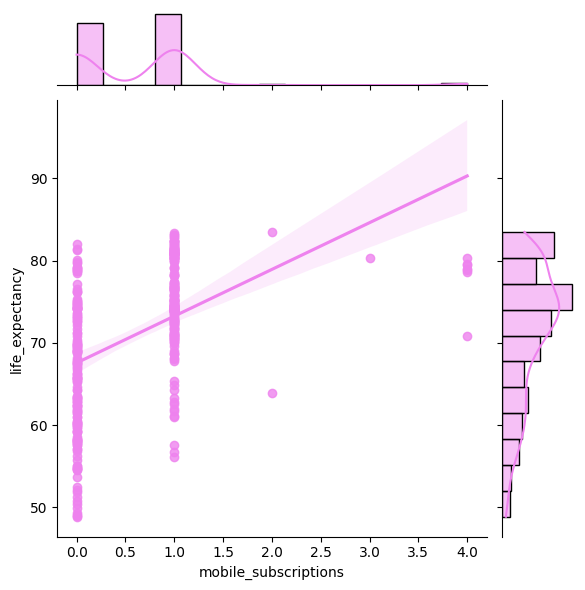

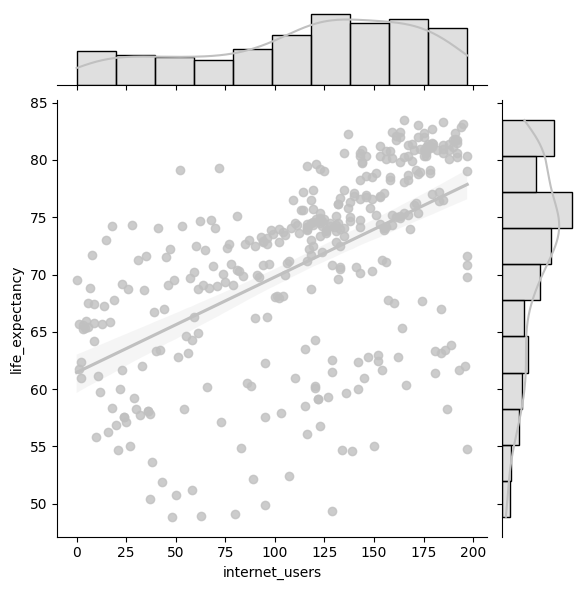

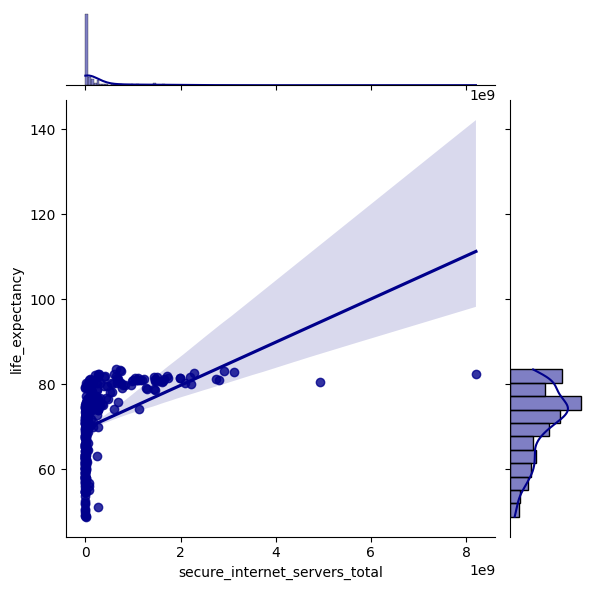

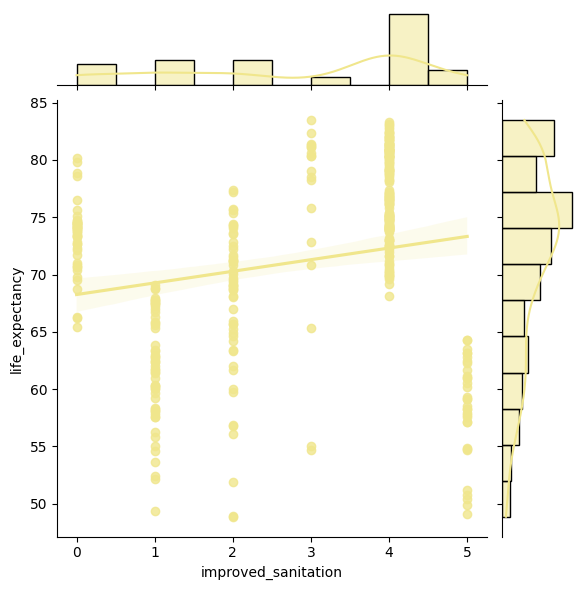

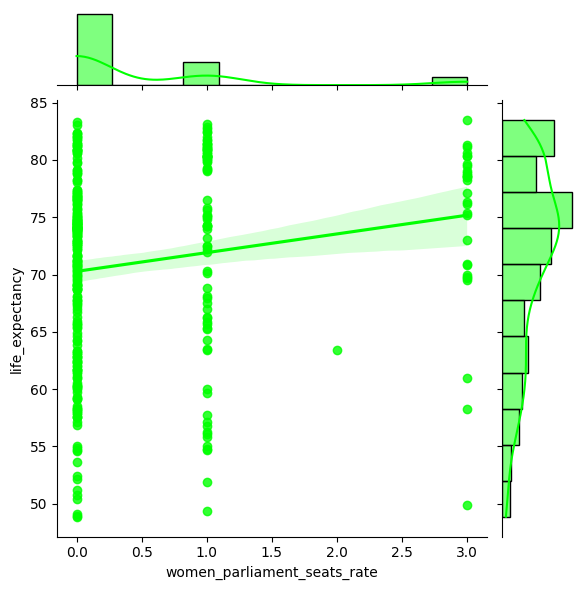

In [326]:
# plot joint plots for 'life_expectancy'
sns.jointplot(y='life_expectancy', x='surface_area', data=data, kind='reg', color='green')
sns.jointplot(y='life_expectancy', x='agricultural_land', data=data, kind='reg', color='blue')
sns.jointplot(y='life_expectancy', x='forest_area', data=data, kind='reg', color='maroon')
sns.jointplot(y='life_expectancy', x='armed_forces_total', data=data, kind='reg', color='maroon')
sns.jointplot(y='life_expectancy', x='urban_pop_major_cities', data=data, kind='reg', color='black')
sns.jointplot(y='life_expectancy', x='urban_pop_minor_cities', data=data, kind='reg', color='brown')
sns.jointplot(y='life_expectancy', x='national_income', data=data, kind='reg', color='gold')
sns.jointplot(y='life_expectancy', x='inflation_annual', data=data, kind='reg', color='yellow')
sns.jointplot(y='life_expectancy', x='mobile_subscriptions', data=data, kind='reg', color='violet')
sns.jointplot(y='life_expectancy', x='internet_users', data=data, kind='reg', color='silver')
sns.jointplot(y='life_expectancy', x='secure_internet_servers_total', data=data, kind='reg', color='darkblue')
sns.jointplot(y='life_expectancy', x='improved_sanitation', data=data, kind='reg', color='khaki')
sns.jointplot(y='life_expectancy', x='women_parliament_seats_rate', data=data, kind='reg', color='lime')
plt.show()

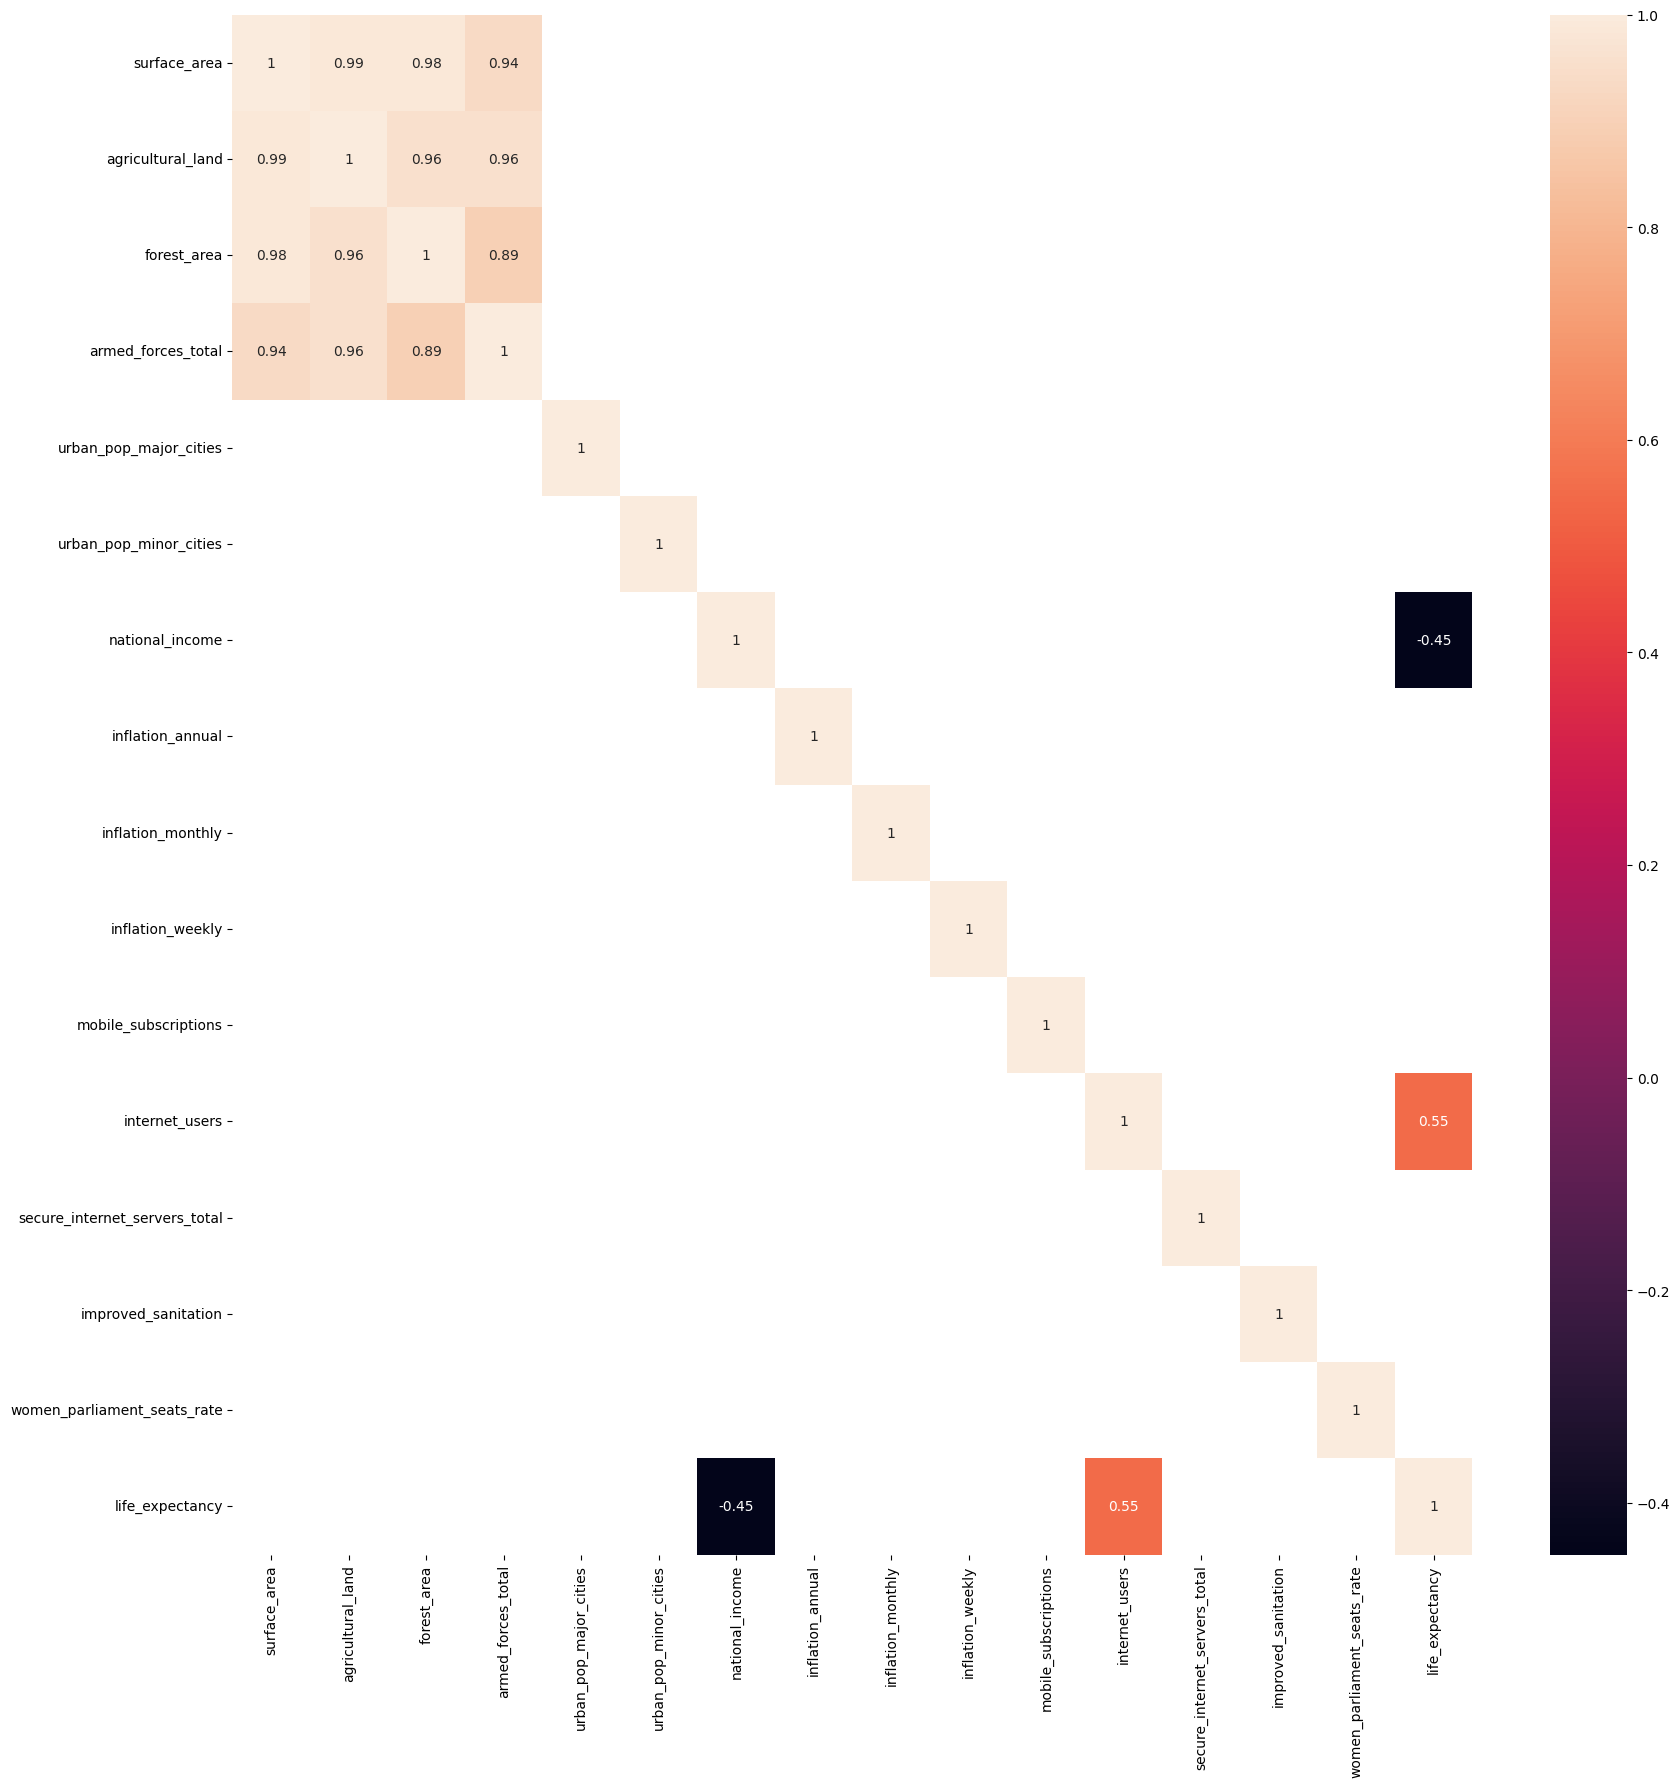

In [327]:
# Correlation heatmap where correlation value is greater than or eual to +0.5 and less than or equal to -0.4
corr = data.corr()
corr = corr[(corr >= 0.5) | (corr <= -0.4)]
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()


<Figure size 1000x1000 with 0 Axes>

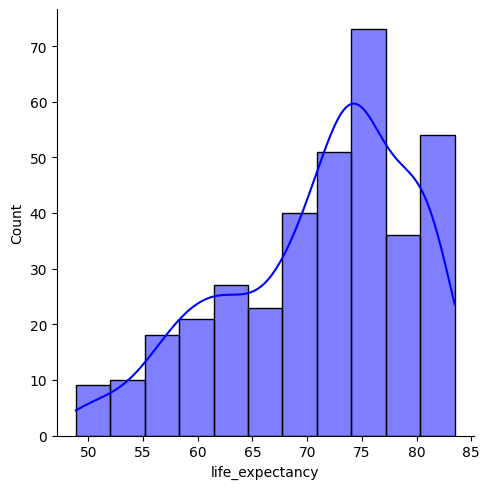

In [328]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize=(10, 10))
sns.displot(data['life_expectancy'], color='blue', kde=True) 
plt.show()

## Feature Selection

After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on.

In [329]:
# Fetures agricultural_land and forest_area are highly correlated with surface_area.
# Remove agricultural_land, forest_area, inflation monthly and weekly and keep surface_area only

data_copy = data.copy()

data_copy.drop(['agricultural_land', 'forest_area', 'inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

print(data_copy.shape)
data_copy.head()


(362, 12)


,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,1.379000e+06,55.747169,4.688831,4,1.374906,0,0,2.623624e+06,0,0,69.494195
1,752610.0,1.650000e+04,16.890687,23.136313,6,1.374906,0,29,2.623624e+06,1,0,59.237366
2,1396.0,1.027774e+04,18.390090,23.139910,4,1.374906,1,185,1.656589e+09,3,3,81.300000
3,2758812.0,1.518650e+06,50.966885,24.522427,0,1.374906,1,169,6.625072e+08,4,1,81.373197
4,340.0,1.005109e+04,5.311885,30.271115,4,0.665339,1,96,2.832808e+07,4,1,73.193561


## Model Training

This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

1. Standardize or Normalize Training Data
2. Train Test Split
3. Train Model
4. Evaluate Important Features

**Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.**

In [330]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them
data_copy = data_copy.drop(cols, axis=1)

scaler = StandardScaler()
data_copy = scaler.fit_transform(data_copy)

In [331]:
# now we will standardize the columns in original data from data_copy
data_copy = pd.DataFrame(data_copy, columns=['surface_area', 'armed_forces_total', 'urban_pop_minor_cities',
                                             'urban_pop_major_cities', 'inflation_annual', 'internet_users',
                                             'secure_internet_servers_total'])

# Add back the columns that were not standardized
data_copy = pd.concat([data_copy, data[cols]], axis=1)

In [332]:
# Train Test Split

data_copy.drop('life_expectancy', axis=1, inplace=True)

X = data_copy
y = data['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Dimensions: ", X_train.shape, y_train.shape)
print("Testing Set Dimensions: ", X_test.shape, y_test.shape)

Training Set Dimensions:  (289, 11) (289,)
Testing Set Dimensions:  (73, 11) (73,)


In [333]:
# Train Random Forest Regressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, rf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, rf.predict(X_test)))


Mean Absolute Error: 2.6889105234732837
R2 Score: 0.7460235704270254
Mean Absolute Error for Training Set: 1.0227090558140048
Mean Absolute Error for Test Set: 2.6889105234732837


In [334]:
# Train xgboost regressor

xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, xgb.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, xgb.predict(X_test)))



Mean Absolute Error: 2.7331781296576683
R2 Score: 0.7465973451449635
Mean Absolute Error for Training Set: 0.0006731114189216834
Mean Absolute Error for Test Set: 2.7331781296576683


In [335]:
# Apply LightGBM Regressor

lgbm = LGBMRegressor(n_estimators=200, random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, lgbm.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, lgbm.predict(X_test)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 289, number of used features: 11
[LightGBM] [Info] Start training from score 71.351171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [336]:
# Apply Bayesian Ridge Regressor

br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, br.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, br.predict(X_test)))


Mean Absolute Error: 4.274280390581515
R2 Score: 0.5952978546716847
Mean Absolute Error for Training Set: 3.7649960049600875
Mean Absolute Error for Test Set: 4.274280390581515


From the above models, we can see that the best model is LGBMRegressor 
as it achieved the lowest Mean Absolute Error (MAE) on the test set (2.542),
indicating better accuracy compared to the other models.

In [337]:
# From the above models, we can see that the best model is LGBMRegressor 
# as it achieved the lowest Mean Absolute Error (MAE) on the test set (2.542),
# indicating better accuracy compared to the other models.

In [338]:
# important features for random forest regressor
for name, importance in zip(X.columns, rf.feature_importances_):
    print('feature:', name, "=", importance)


feature: surface_area = 0.03426126385247024
feature: armed_forces_total = 0.06910278221077783
feature: urban_pop_minor_cities = 0.02893304790745695
feature: urban_pop_major_cities = 0.05564403696874077
feature: inflation_annual = 0.017760263022457867
feature: internet_users = 0.0982370849632675
feature: secure_internet_servers_total = 0.5216904574344721
feature: national_income = 0.1419273602298833
feature: mobile_subscriptions = 0.007476928612671687
feature: improved_sanitation = 0.017505998938687494
feature: women_parliament_seats_rate = 0.007460775859114402


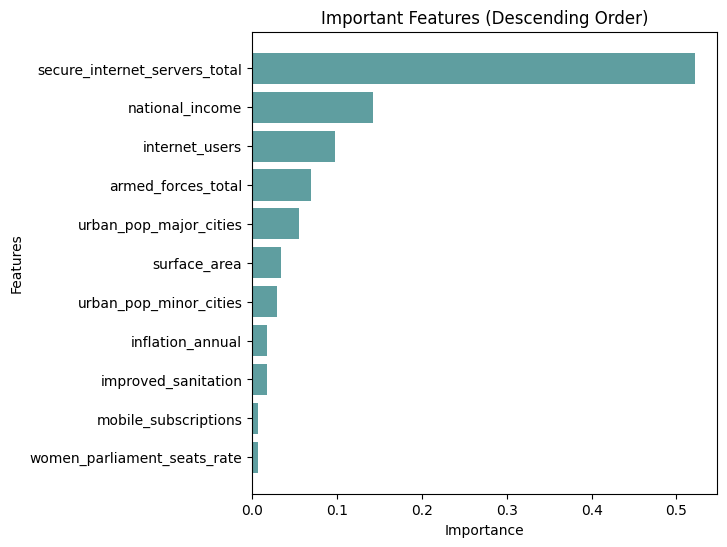

In [339]:
# Sample data
features = data_copy.columns  # Assuming these are your feature names
importances = rf.feature_importances_  # Assuming these are your feature importances from a RandomForest model

# Sort the features and importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create horizontal bar graph in descending order
plt.figure(figsize=(6, 6))
plt.barh(sorted_features, sorted_importances, color='cadetblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()